In [1]:
import os
import glob
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import watchcbb.utils as utils

In [2]:
dfs = []
for fname in glob.glob("../data/game_data/*.csv"):
    dfs.append(pd.read_csv(fname))
df = pd.concat(dfs)
df.Date = pd.to_datetime(df.Date)
df = df.sort_values("Date").reset_index()
# df = df.query("Season==2019").reset_index()
df["poss"] = 0.5*(df["WFGA"] + 0.44*df["WFTA"] - df["WOR"] + df["WTO"] + df["LFGA"] + 0.44*df["LFTA"] - df["LOR"] + df["LTO"])
print("Shape:",df.shape)
df.head(10)

Shape: (54760, 37)


,index,Season,Date,Type,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,poss
0,0,2011,2010-11-08,RG,illinois,79,california-irvine,65,H,0,...,14,22,11,26,12,14,7,1,21,74.90
1,3,2011,2010-11-08,RG,pittsburgh,83,rhode-island,75,H,0,...,13,16,9,20,16,16,7,6,25,75.62
2,1,2011,2010-11-08,RG,maryland,105,seattle,76,H,0,...,17,22,13,16,11,27,18,1,31,98.36
3,2,2011,2010-11-08,RG,texas,83,navy,52,H,0,...,10,18,5,21,8,16,5,5,24,80.44
4,4,2011,2010-11-10,RG,maryland,75,college-of-charleston,74,H,0,...,16,19,10,25,12,22,8,8,19,77.64
5,5,2011,2010-11-10,RG,pittsburgh,97,illinois-chicago,54,H,0,...,7,9,5,15,9,11,0,3,18,67.88
6,6,2011,2010-11-10,RG,illinois,84,toledo,45,H,0,...,10,19,3,16,9,23,6,0,14,72.00
7,7,2011,2010-11-10,RG,texas,89,louisiana-tech,58,H,0,...,13,20,13,25,4,22,6,5,21,83.74
8,78,2011,2010-11-12,RG,tulane,91,maryland-eastern-shore,62,A,0,...,19,26,9,16,11,21,4,2,28,78.04
9,77,2011,2010-11-12,RG,marquette,97,prairie-view,58,H,0,...,7,11,3,13,12,20,11,3,27,79.12


In [3]:
first, second = utils.partition_games(df, frac=0.7)
print(df.iloc[first].shape[0], df.iloc[second].shape[0])

38328 16432


In [4]:
season_stats_dict = utils.compute_season_stats(df.iloc[first])
season_stats_df = utils.stats_dict_to_df(season_stats_dict)
utils.add_advanced_stats(season_stats_df)
season_stats_dict = utils.stats_df_to_dict(season_stats_df)
print(season_stats_df.shape)
season_stats_df.head()

(3497, 48)


,year,team_id,wins,losses,totOT,TScore,TFGM,TFGA,TFGM3,TFGA3,...,Torbp,Tftr,Oposs,Oeff,Oastr,Otovr,Oefgp,Oorbp,Oftr,rawpace
0,2011,air-force,12,8,2,1328,463,941,133,333,...,0.192678,0.414453,1261.96,101.825731,0.157057,0.169381,0.485780,0.342949,0.283486,61.890370
1,2011,akron,12,10,2,1498,527,1263,175,508,...,0.289833,0.306413,1522.28,96.434296,0.137450,0.190418,0.480897,0.286472,0.383721,68.349663
2,2011,alabama,15,7,1,1493,566,1249,96,311,...,0.305990,0.293034,1502.48,83.595123,0.110456,0.199252,0.409393,0.350689,0.346633,67.763164
3,2011,alabama-am,6,10,0,959,348,896,62,237,...,0.299213,0.377232,1143.32,90.875695,0.136156,0.209393,0.472254,0.305206,0.399773,71.501250
4,2011,alabama-birmingham,16,6,5,1537,547,1224,166,480,...,0.291248,0.307190,1472.84,94.375492,0.130914,0.164221,0.457404,0.330330,0.287420,64.801768


In [5]:
season_stats_df.query('year==2019').sort_values('rawpace').tail()

,year,team_id,wins,losses,totOT,TScore,TFGM,TFGA,TFGM3,TFGA3,...,Torbp,Tftr,Oposs,Oeff,Oastr,Otovr,Oefgp,Oorbp,Oftr,rawpace
2903,2019,green-bay,10,12,2,1787,632,1412,184,533,...,0.257468,0.345609,1720.64,108.854845,0.144713,0.158850,0.539202,0.255114,0.360656,77.333933
3000,2019,north-carolina,19,4,1,2031,726,1532,203,535,...,0.276273,0.327023,1776.72,96.019632,0.144185,0.170009,0.489184,0.261494,0.305652,77.711568
3063,2019,savannah-state,7,15,1,1654,581,1508,253,884,...,0.300539,0.241379,1759.56,112.869126,0.183773,0.164379,0.560926,0.273128,0.322668,80.038870
2876,2019,eastern-kentucky,8,14,3,1766,622,1486,189,592,...,0.296044,0.327052,1788.84,105.096040,0.145986,0.188988,0.538293,0.240936,0.409190,80.484469
2887,2019,florida-international,10,10,0,1604,563,1313,169,568,...,0.282468,0.369383,1592.84,106.037016,0.144561,0.192815,0.547049,0.264339,0.367624,80.731000


Text(0.5, 0, 'Pace')

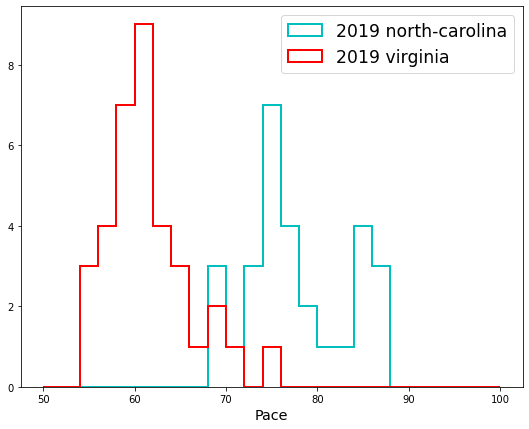

In [6]:
year = 2019
tid1, tid2 = 'north-carolina', 'virginia'
poss1 = df.query(f'Season=={year} & (WTeamID=="{tid1}" | LTeamID=="tid1")').poss.values
poss2 = df.query(f'Season=={year} & (WTeamID=="{tid2}" | LTeamID=="tid2")').poss.values
plt.figure(figsize=(9,7))
plt.hist(poss1, bins=np.linspace(50,100,26), histtype='step', lw=2, label=str(year)+' '+tid1, color='c')
plt.hist(poss2, bins=np.linspace(50,100,26), histtype='step', lw=2, label=str(year)+' '+tid2, color='r')
plt.legend(fontsize='xx-large')
plt.xlabel('Pace', fontsize='x-large')

In [7]:
mean_poss = {year:season_stats_df.query(f'year=={year}').rawpace.mean() for year in season_stats_df.year.unique()}
for i,row in season_stats_df.iterrows():
    season_stats_dict[row.year][row.team_id]["rawpace"] = row.rawpace

def predict_poss(row):
    p1 = season_stats_dict[row.Season][row.WTeamID]["rawpace"]
    p2 = season_stats_dict[row.Season][row.WTeamID]["rawpace"]
    return p1*p2/mean_poss[row.Season]

pred_poss = df.iloc[second].apply(predict_poss, axis=1).values

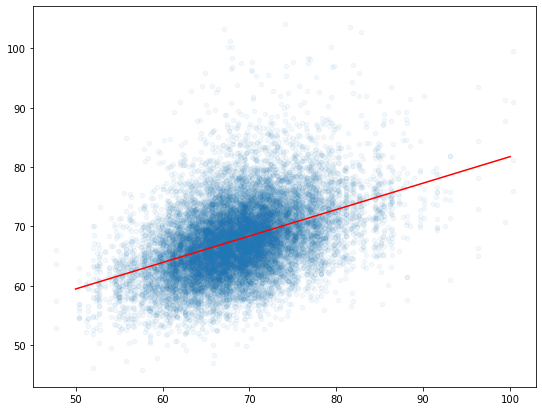

In [8]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(9,7))
xs = pred_poss.reshape(-1,1)
ys = df.iloc[second].poss.values.reshape(-1,1)
plt.scatter(xs, ys, s=20, alpha=0.05)

linreg = LinearRegression()
linreg.fit(xs, ys)
linreg.score(xs,ys)
xl = np.array([50,100]).reshape(-1,1)
yl = linreg.predict(xl)
plt.plot(xl, yl, 'r-')

Text(0, 0.5, 'Defensive efficiency')

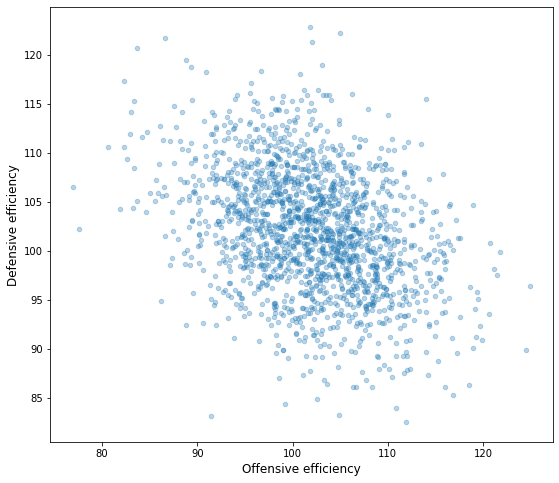

In [9]:
plt.figure(figsize=(9,8))
xs = season_stats_df.query('year>=2016').Teff
ys = season_stats_df.query('year>=2016').Oeff
plt.scatter(xs, ys, s=20, alpha=0.3)
plt.xlabel("Offensive efficiency", fontsize='large')
plt.ylabel("Defensive efficiency", fontsize='large')

In [10]:
season_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     3497 non-null   int64  
 1   team_id  3497 non-null   object 
 2   wins     3497 non-null   int64  
 3   losses   3497 non-null   int64  
 4   totOT    3497 non-null   int64  
 5   TScore   3497 non-null   int64  
 6   TFGM     3497 non-null   int64  
 7   TFGA     3497 non-null   int64  
 8   TFGM3    3497 non-null   int64  
 9   TFGA3    3497 non-null   int64  
 10  TFTM     3497 non-null   int64  
 11  TFTA     3497 non-null   int64  
 12  TOR      3497 non-null   int64  
 13  TDR      3497 non-null   int64  
 14  TAst     3497 non-null   int64  
 15  TTO      3497 non-null   int64  
 16  TStl     3497 non-null   int64  
 17  TBlk     3497 non-null   int64  
 18  TPF      3497 non-null   int64  
 19  OScore   3497 non-null   int64  
 20  OFGM     3497 non-null   int64  
 21  OFGA     3497 